In [2]:
# install.packages("tidyverse")
#install.packages("dplyr")
#install.packages("sp")
#devtools::install_github("ropensci/geojsonio")
#install.packages("ggplot2")
install.packages("googleAuthR")
#install.packages("googleAnalyticsR")
#install.packages("searchConsoleR")
#install.packages("RgoogleMaps")
#install.packages("maptools")
#install.packages("mapsapi")
#install.packages("dismo")
#install.packages("ggmap")
install.packages("tidyverse")


also installing the dependencies ‘rlang’, ‘gargle’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘vctrs’, ‘haven’, ‘hms’, ‘modelr’, ‘purrr’, ‘reprex’, ‘rvest’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library(geoband)
library(dplyr)
library(sp)
library(raster)
library(geojsonio)
library(RgoogleMaps)
library(ggmap)
library(ggplot2)
library(googleAuthR)
library(googleAnalyticsR)
library(searchConsoleR)
library(maptools)

library(broom)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘raster’

The following object is masked from ‘package:dplyr’:

    select


Attaching package: ‘geojsonio’

The following object is masked from ‘package:base’:

    pretty

Loading required package: ggplot2
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


ERROR: Error in library(googleAuthR): there is no package called ‘googleAuthR’


In [13]:
library("tidyverse")

ERROR: Error: package or namespace load failed for ‘tidyverse’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘vctrs’ 0.2.0 is already loaded, but >= 0.2.1 is required


In [6]:
GetCompasData('SBJ_1910_001', '1', 'PJT001_TripChain.csv')
GetCompasData('SBJ_1910_001', '2', 'stations_table.csv')
GetCompasData('SBJ_1910_001', '3', 'sk_emd_od.csv')


In [3]:
float_pop <- read.csv("sk_emd_od.csv")

In [4]:
admin <- geojsonio::geojson_read("PJT001_tl_scco_emd.geojson", what = "sp")
save(admin, file="./01_001_admin.rdata")     

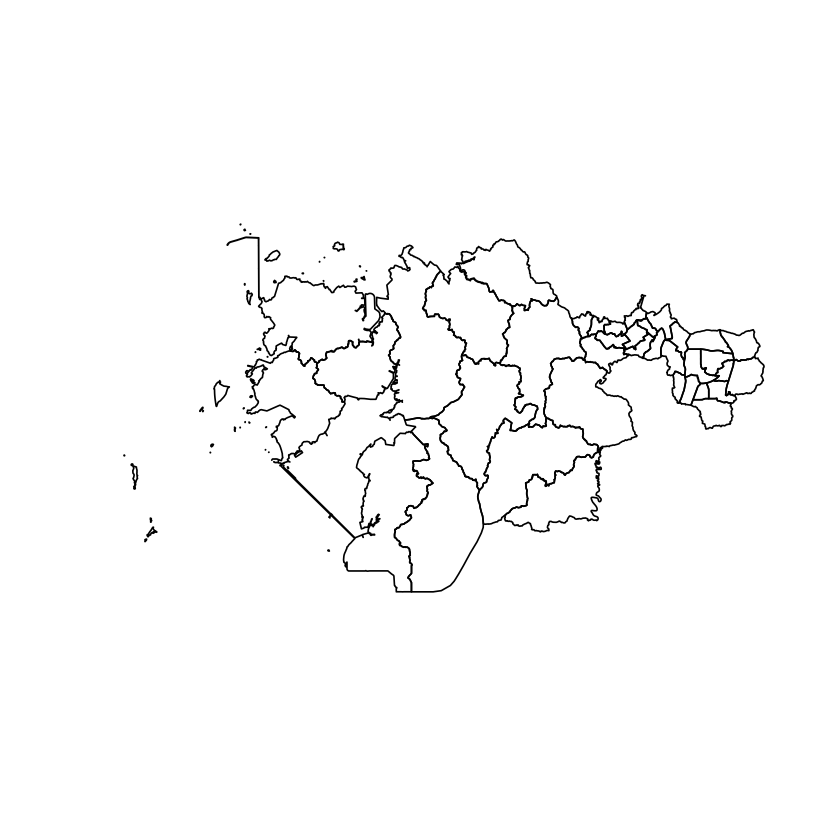

In [5]:

fishnet <- as(raster::extent(126.50625, 127.42245, 36.99653, 37.483419), "SpatialPolygons")
proj4string(fishnet) <- "+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0"
fishnet <- raster(fishnet) 
res(fishnet) <- .01                                                   # (2) 분할단위: 0.1도
crs(fishnet) <- CRS("+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 ") # (7) 투영하기 
fishnet <- rasterToPolygons(fishnet)                                  # (3) 폴리곤 변환
plot(admin) 



In [7]:
fortify

function (model, data, ...) 
UseMethod("fortify")
<bytecode: 0x9043870>
<environment: namespace:ggplot2>

Source : https://maps.googleapis.com/maps/api/staticmap?center=37.15,126.88&zoom=11&size=640x640&scale=1&maptype=roadmap&language=en-EN&key=xxx
Regions defined for each Polygons


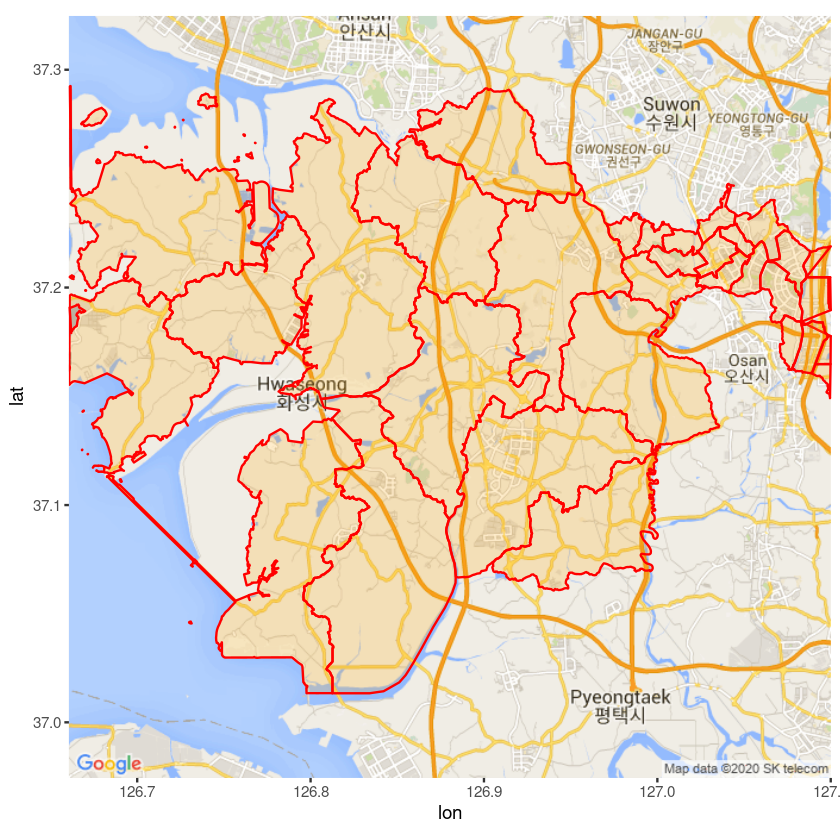

In [9]:

ggmap(city_map)+
    geom_polygon(data=fortify(admin), aes(long, lat, group = group),  fill = "orange", colour = "red", alpha = 0.2)
    

In [10]:
float_pop <- read.csv("sk_emd_od.csv")
head(float_pop)

std_ymd,tm_trm,org,dst,pop
<int>,<fct>,<fct>,<fct>,<dbl>
20180703,00_05,기배동,남양읍,11.04
20180703,00_05,기배동,동탄1동,13.80
20180703,00_05,기배동,동탄2동,24.84
20180703,00_05,기배동,동탄3동,8.28
20180703,00_05,기배동,동탄4동,2.76
20180703,00_05,기배동,동탄5동,8.28


In [11]:
TripChain <- read.csv("TripChain.csv")


In [21]:
unique(c(levels(float_pop$org),levels(float_pop$dst)))

[1] "기배동"  "남양읍"  "동탄1동" "동탄2동" "동탄3동" "동탄4동" "동탄5동"
 [8] "동탄6동" "마도면"  "매송면"  "반월동"  "병점1동" "병점2동" "봉담읍" 
[15] "비봉면"  "서신면"  "송산면"  "양감면"  "우정읍"  "장안면"  "정남면" 
[22] "진안동"  "팔탄면"  "향남읍"  "화산동"

In [14]:
library(dplyr)
float_2 <- float_pop %>%
    filter(std_ymd == 20180702, tm_trm=="06_11")
float_2

std_ymd,tm_trm,org,dst,pop
<int>,<fct>,<fct>,<fct>,<dbl>
20180702,06_11,기배동,남양읍,187.64
20180702,06_11,기배동,동탄1동,57.96
20180702,06_11,기배동,동탄2동,126.95
20180702,06_11,기배동,동탄3동,52.44
20180702,06_11,기배동,동탄4동,24.84
20180702,06_11,기배동,동탄5동,27.60
20180702,06_11,기배동,동탄6동,113.14
20180702,06_11,기배동,마도면,71.74
20180702,06_11,기배동,매송면,57.96


In [12]:
place <- unique(c(levels(float_pop$org),levels(float_pop$dst)))
lat <- c(37.2239, 37.211740, 37.2064, 37.1974, 37.2098 , 37.199558, 37.207629,37.172673, 37.2055,37.2523, 37.2284, 37.2067, 37.2117, 37.2202, 37.2352, 37.1666, 37.2178, 37.0813, 37.0898, 37.0798, 37.1684, 37.2128, 37.1611, 37.1321, 37.2053)
lon <- c(126.9842,  126.823766, 127.0737,127.0737, 127.0588, 127.112296, 127.111708, 127.089157, 126.7697, 126.9091, 127.0593, 127.0368, 127.0434, 126.9503, 126.8738, 126.7087, 126.7392, 126.9444,126.8153, 126.8313, 126.9829, 127.0389, 126.9032, 126.9200, 127.0143  )

In [13]:
coord <- data.frame(place, lat, lon)
coord

place,lat,lon
<fct>,<dbl>,<dbl>
기배동,37.22390,126.9842
남양읍,37.21174,126.8238
동탄1동,37.20640,127.0737
동탄2동,37.19740,127.0737
동탄3동,37.20980,127.0588
동탄4동,37.19956,127.1123
동탄5동,37.20763,127.1117
동탄6동,37.17267,127.0892
마도면,37.20550,126.7697


In [19]:
colnames(coord) <- c("org", "org_lat", "org_lon")
float_3 <- left_join(float_2, coord, by="org")
colnames(coord) <- c("dst", "dst_lat", "dst_lon")
float_4 <- left_join(float_3, coord, by="dst")
head(float_4)

std_ymd,tm_trm,org,dst,pop,org_lat,org_lon,dst_lat,dst_lon
<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20180702,06_11,기배동,남양읍,187.64,37.2239,126.9842,37.21174,126.8238
20180702,06_11,기배동,동탄1동,57.96,37.2239,126.9842,37.20640,127.0737
20180702,06_11,기배동,동탄2동,126.95,37.2239,126.9842,37.19740,127.0737
20180702,06_11,기배동,동탄3동,52.44,37.2239,126.9842,37.20980,127.0588
20180702,06_11,기배동,동탄4동,24.84,37.2239,126.9842,37.19956,127.1123
20180702,06_11,기배동,동탄5동,27.60,37.2239,126.9842,37.20763,127.1117


In [90]:
float_5 <- filter(float_4, pop>459.39)
float_popul <- float_4 %>% group_by(dst) %>% summarize(population=sum(pop), lat=median(dst_lat), lon=median(dst_lon))

In [89]:
summary(float_4$pop)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.76   27.60  104.86  525.00  459.39 9913.37 

In [55]:
city_map <- get_map(c(left=126.6, bottom=37, right=127.2, top=37.3), scale=1, maptype='roadmap')

In [50]:
install.packages("tmap")

also installing the dependencies ‘BH’, ‘colourvalues’, ‘googlePolylines’, ‘geojsonsf’, ‘jsonify’, ‘sfheaders’, ‘rapidjsonr’, ‘spatialwidget’, ‘mapdeck’, ‘tmaptools’, ‘sf’, ‘stars’, ‘classInt’, ‘leafem’

Warning message in install.packages("tmap"):
“installation of package ‘sf’ had non-zero exit status”Warning message in install.packages("tmap"):
“installation of package ‘stars’ had non-zero exit status”Warning message in install.packages("tmap"):
“installation of package ‘spatialwidget’ had non-zero exit status”Warning message in install.packages("tmap"):
“installation of package ‘tmaptools’ had non-zero exit status”Warning message in install.packages("tmap"):
“installation of package ‘mapdeck’ had non-zero exit status”Warning message in install.packages("tmap"):
“installation of package ‘leafem’ had non-zero exit status”Warning message in install.packages("tmap"):
“installation of package ‘tmap’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.ht

In [209]:
unique(float_2$tm_trm)

[1] 00_05 06_11 12_17 18_23
Levels: 00_05 06_11 12_17 18_23

In [26]:
coord1 <-coord
colnames(coord1) <- c("org", "lat1", "lon1")
coord2 <- coord
colnames(coord2) <- c("dst", "lat2", "lon2")
float_2 <- full_join(float_2, coord1) 
float_2 <- full_join(float_2, coord2) 

Joining, by = "org"
Joining, by = "dst"


In [171]:
library(dplyr)
org_pop <- float_pop %>%
    filter(std_ymd == 20180702) %>%
    group_by(tm_trm, org) %>%
    summarize( total=sum(pop, na.rm=T)) %>%
    filter(total > 10000)
(org_pop)

tm_trm,org,total
<fct>,<fct>,<dbl>
06_11,남양읍,12857.64
06_11,동탄2동,33661.10
06_11,동탄3동,26923.38
06_11,동탄4동,22531.11
06_11,동탄5동,12383.07
06_11,동탄6동,18693.21
06_11,반월동,12507.11
06_11,병점1동,13928.09
06_11,병점2동,13906.06


In [62]:
install.packages("geojsonR")
library(geojsonR)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [165]:
name <- data.frame()
id_data[[1]][[1]][[2]][3][[1]]

[1] "양감면"

In [166]:
name[1,1]<- id_data[[1]][[1]][[2]][2][[1]]
name[2,1]<- id_data[[1]][[2]][[2]][2][[1]]
name[3,1]<- id_data[[1]][[3]][[2]][2][[1]]
name[4,1]<- id_data[[1]][[4]][[2]][2][[1]]
name[5,1]<- id_data[[1]][[5]][[2]][2][[1]]
name[6,1]<- id_data[[1]][[6]][[2]][2][[1]]
name[7,1]<- id_data[[1]][[7]][[2]][2][[1]]
name[8,1]<- id_data[[1]][[8]][[2]][2][[1]]
name[9,1]<- id_data[[1]][[9]][[2]][2][[1]]
name[10,1]<- id_data[[1]][[10]][[2]][2][[1]]
name[11,1]<- id_data[[1]][[11]][[2]][2][[1]]
name[12,1]<- id_data[[1]][[12]][[2]][2][[1]]
name[13,1]<- id_data[[1]][[13]][[2]][2][[1]]
name[14,1]<- id_data[[1]][[14]][[2]][2][[1]]
name[15,1]<- id_data[[1]][[15]][[2]][2][[1]]
name[16,1]<- id_data[[1]][[16]][[2]][2][[1]]
name[17,1]<- id_data[[1]][[17]][[2]][2][[1]]
name[18,1]<- id_data[[1]][[18]][[2]][2][[1]]
name[19,1]<- id_data[[1]][[19]][[2]][2][[1]]
name[20,1]<- id_data[[1]][[20]][[2]][2][[1]]
name[21,1]<- id_data[[1]][[21]][[2]][2][[1]]
name[22,1]<- id_data[[1]][[22]][[2]][2][[1]]
name[23,1]<- id_data[[1]][[23]][[2]][2][[1]]
name[24,1]<- id_data[[1]][[24]][[2]][2][[1]]
name[25,1]<- id_data[[1]][[25]][[2]][2][[1]]
name[26,1]<- id_data[[1]][[26]][[2]][2][[1]]
name[27,1]<- id_data[[1]][[27]][[2]][2][[1]]
name[28,1]<- id_data[[1]][[28]][[2]][2][[1]]
name[29,1]<- id_data[[1]][[29]][[2]][2][[1]]
name[30,1]<- id_data[[1]][[30]][[2]][2][[1]]
name[31,1]<- id_data[[1]][[31]][[2]][2][[1]]
name[32,1]<- id_data[[1]][[32]][[2]][2][[1]]
name[33,1]<- id_data[[1]][[33]][[2]][2][[1]]
name[34,1]<- id_data[[1]][[34]][[2]][2][[1]]
name[35,1]<- id_data[[1]][[35]][[2]][2][[1]]
name[36,1]<- id_data[[1]][[36]][[2]][2][[1]]
name[37,1]<- id_data[[1]][[37]][[2]][2][[1]]


In [169]:
name[1,2]<- id_data[[1]][[1]][[2]][3][[1]]
name[2,2]<- id_data[[1]][[2]][[2]][3][[1]]
name[3,2]<- id_data[[1]][[3]][[2]][3][[1]]
name[4,2]<- id_data[[1]][[4]][[2]][3][[1]]
name[5,2]<- id_data[[1]][[5]][[2]][3][[1]]
name[6,2]<- id_data[[1]][[6]][[2]][3][[1]]
name[7,2]<- id_data[[1]][[7]][[2]][3][[1]]
name[8,2]<- id_data[[1]][[8]][[2]][3][[1]]
name[9,2]<- id_data[[1]][[9]][[2]][3][[1]]
name[10,2]<- id_data[[1]][[10]][[2]][3][[1]]
name[11,2]<- id_data[[1]][[11]][[2]][3][[1]]
name[12,2]<- id_data[[1]][[12]][[2]][3][[1]]
name[13,2]<- id_data[[1]][[13]][[2]][3][[1]]
name[14,2]<- id_data[[1]][[14]][[2]][3][[1]]
name[15,2]<- id_data[[1]][[15]][[2]][3][[1]]
name[16,2]<- id_data[[1]][[16]][[2]][3][[1]]
name[17,2]<- id_data[[1]][[17]][[2]][3][[1]]
name[18,2]<- id_data[[1]][[18]][[2]][3][[1]]
name[19,2]<- id_data[[1]][[19]][[2]][3][[1]]
name[20,2]<- id_data[[1]][[20]][[2]][3][[1]]
name[21,2]<- id_data[[1]][[21]][[2]][3][[1]]
name[22,2]<- id_data[[1]][[22]][[2]][3][[1]]
name[23,2]<- id_data[[1]][[23]][[2]][3][[1]]
name[24,2]<- id_data[[1]][[24]][[2]][3][[1]]
name[25,2]<- id_data[[1]][[25]][[2]][3][[1]]
name[26,2]<- id_data[[1]][[26]][[2]][3][[1]]
name[27,2]<- id_data[[1]][[27]][[2]][3][[1]]
name[28,2]<- id_data[[1]][[28]][[2]][3][[1]]
name[29,2]<- id_data[[1]][[29]][[2]][3][[1]]
name[30,2]<- id_data[[1]][[30]][[2]][3][[1]]
name[31,2]<- id_data[[1]][[31]][[2]][3][[1]]
name[32,2]<- id_data[[1]][[32]][[2]][3][[1]]
name[33,2]<- id_data[[1]][[33]][[2]][3][[1]]
name[34,2]<- id_data[[1]][[34]][[2]][3][[1]]
name[35,2]<- id_data[[1]][[35]][[2]][3][[1]]
name[36,2]<- id_data[[1]][[36]][[2]][3][[1]]
name[37,2]<- id_data[[1]][[37]][[2]][3][[1]]



In [170]:
name


V1,V2
<chr>,<chr>
Yanggam-myeon,양감면
Jeongnam-myeon,정남면
Jinan-dong,진안동
Byeongjeom-dong,병점동
Neung-dong,능동
Gisan-dong,기산동
Banwol-dong,반월동
Banjeong-dong,반정동
Hwanggye-dong,황계동


In [67]:
library(dplyr)
org_pop <- float_pop %>%
    filter(std_ymd == 20180702) %>%
    group_by(tm_trm, org) %>%
    summarize( total=sum(pop, na.rm=T)) %>%
    filter(total > 10000)
org_pop %>%
    filter(tm_trm =="18_23") %>%
    arrange( desc(total)) %>%
    head(10)

tm_trm,org,total
<fct>,<fct>,<dbl>
18_23,동탄2동,30165.28
18_23,동탄3동,25579.79
18_23,동탄4동,21791.60
18_23,봉담읍,19476.69
18_23,향남읍,19374.65
18_23,동탄6동,19040.63
18_23,진안동,16789.26
18_23,병점2동,12609.43
18_23,반월동,12245.08


In [66]:
org_pop

tm_trm,org,total
<fct>,<fct>,<dbl>
06_11,남양읍,12857.64
06_11,동탄2동,33661.10
06_11,동탄3동,26923.38
06_11,동탄4동,22531.11
06_11,동탄5동,12383.07
06_11,동탄6동,18693.21
06_11,반월동,12507.11
06_11,병점1동,13928.09
06_11,병점2동,13906.06


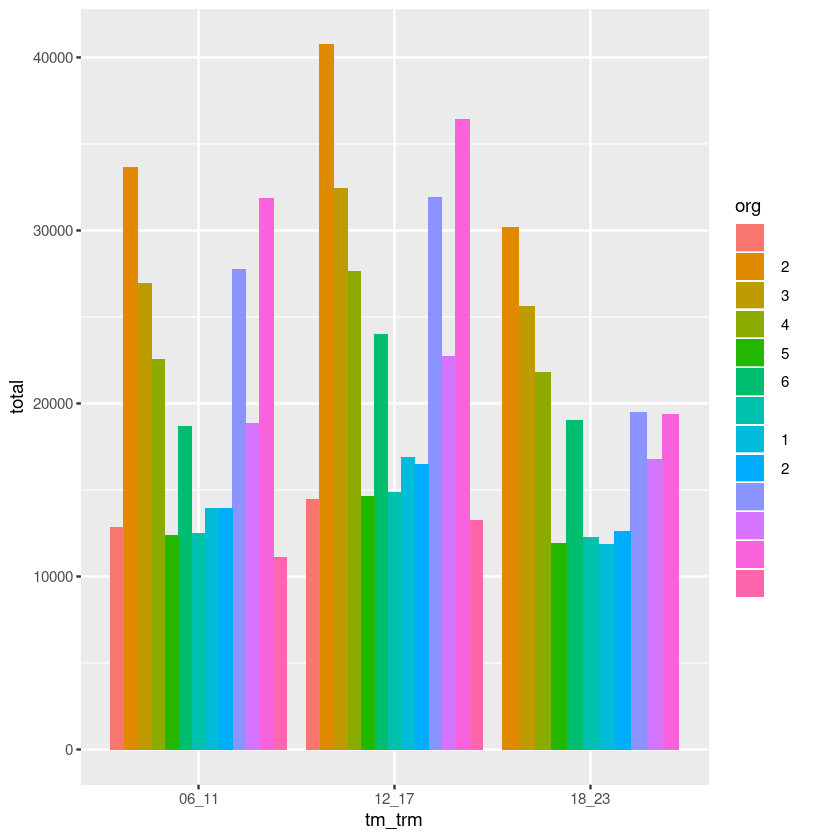

In [53]:
library(ggplot2)
ggplot(data=org_pop)+
    geom_bar(
        mapping = aes(x=tm_trm, y=total, fill=org), stat='identity',
        position = "dodge"
    )

In [68]:
dst_pop <- float_pop %>%
    filter(std_ymd == 20180702) %>%
    group_by(tm_trm, dst) %>%
    summarize( total=sum(pop, na.rm=T)) %>%
    filter(total > 10000)
dst_pop %>%
    filter(tm_trm =="18_23") %>%
    arrange( desc(total)) %>%
    head(10)

tm_trm,dst,total
<fct>,<fct>,<dbl>
18_23,동탄2동,29679.63
18_23,반월동,21838.31
18_23,동탄1동,18726.13
18_23,동탄3동,18323.28
18_23,동탄6동,16259.52
18_23,진안동,15009.66
18_23,동탄5동,14284.08
18_23,봉담읍,13188.88
18_23,팔탄면,12579.02


In [55]:
float_pop

std_ymd,tm_trm,org,dst,pop
<int>,<fct>,<fct>,<fct>,<dbl>
20180703,00_05,기배동,남양읍,11.04
20180703,00_05,기배동,동탄1동,13.80
20180703,00_05,기배동,동탄2동,24.84
20180703,00_05,기배동,동탄3동,8.28
20180703,00_05,기배동,동탄4동,2.76
20180703,00_05,기배동,동탄5동,8.28
20180703,00_05,기배동,동탄6동,8.28
20180703,00_05,기배동,마도면,5.52
20180703,00_05,기배동,매송면,11.04


Regions defined for each Polygons


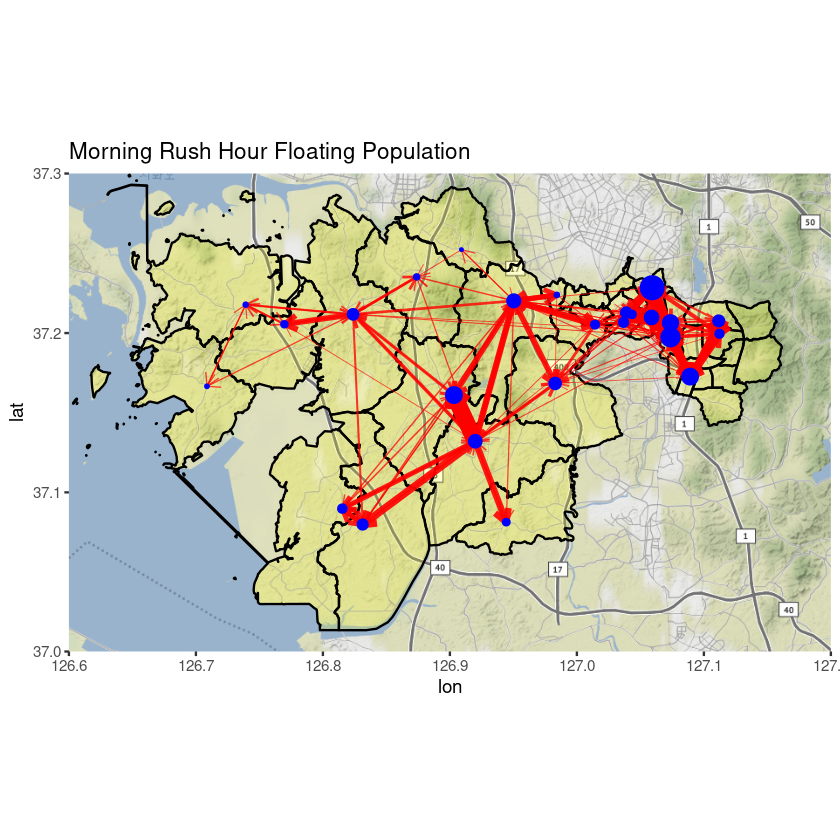

In [103]:
ggmap(city_map)+
    geom_polygon(data=fortify(admin), aes(long, lat, group = group),  fill = "yellow", colour = "black", alpha = 0.2) +
    geom_segment(data=float_5, aes(x=org_lon, y=org_lat, xend=dst_lon, yend=dst_lat), 
                    size= (float_5$pop)/max(float_5$pop)*3.5,
                alpha=log(float_5$pop)/max(log(float_5$pop)),
                colour="red",
                 arrow = arrow(length = unit(0.03, "npc")))+
    geom_point(data=float_popul, aes(x=lon, y=lat), colour="blue", size=(float_popul$population)/max(float_popul$population)*6)+
    ggtitle("Morning Rush Hour Floating Population")

    